In [1]:
#2nd requirment of the project 

In [2]:
import pandas as pd
import numpy as np

# Load data
data = pd.read_csv('RomanUrduDataSet.csv')

# Inspecting the data
print(data.head())                                                           # Display the first five rows of the dataset
print(data.describe())                                                         # Display statistical summary of the dataset

# Handling missing values  
data.dropna(inplace=True) # Remove rows with any missing values

# Removing duplicates
data.drop_duplicates(inplace=True)  # Remove duplicated rows

# Text normalization and noise removal
data['comments'] = data['comments'].str.lower().replace('[^\w\s]', '', regex=True) # all will be changed to lower case and also remove white space and alpha numeric and underscore
#after this dataset that is all lowercase and free of special characters, punctuation, and numbers.

# Removing stop words
# Assuming you have a list of stop words for Roman Urdu
stop_words = set(['a list', 'of roman', 'urdu stop', 'words'])
data['comments'] = data['comments'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))
#in this process we remove the stop words and used lambda python function to apply stop word
#removal operation efecintly and split function used to split each comments into w

# Save the cleaned data
data.to_csv('cleaned_data.csv', index=False)
#hence we have full filled our 2nd functional requirments.


                                            comments   classes Unnamed: 2
0  Aala taleem ke liye Cambridge gae to angrezi s...  Positive        NaN
1  Lekin is tarha ke kitne waqeaat honge jo manza...  Positive        NaN
2  Question: Guzishta arse Deal Stain ne musalsal...  Negative        NaN
3  Retire hone ka bawajud cricket  se Javed Miand...  Positive        NaN
4  ab ham Nadeem key nam se jantey haien to keya ...  Positive        NaN
       comments   classes Unnamed: 2
count     11224     11224          4
unique    11021         4          4
top        Good  Positive  till here
freq         23      5959          1


In [3]:
import pandas as pd

# Load the cleaned data
data = pd.read_csv('cleaned_data.csv')

# Remove unnecessary columns
data.drop(columns=['Unnamed: 2'], inplace=True, errors='ignore')  # Remove this column if it's indeed unnecessary

# Removing noise such as special characters and numbers
data['comments'] = data['comments'].str.replace('[^a-zA-Z\s]', '', regex=True)

# Convert to lowercase to maintain consistency
data['comments'] = data['comments'].str.lower()

# You should have a list of Roman Urdu stop words available
stop_words = {'ai', 'he', 'jo', 'ke', 'se', 'ki'}  # Example: add actual Roman Urdu stop words
data['comments'] = data['comments'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

# Remove duplicates
data.drop_duplicates(subset='comments', inplace=True)# Remove duplicated rows

# Save the fully cleaned data
data.to_csv('fully_cleaned_data.csv', index=False)
#and here we will display result of 2nd functional requirment
# Display the first few rows to check the result
print(data.head())

# Also, print out the general structure and summary to see the changes
print(data.describe())



                                            comments   classes
0  jahil awam ko jahil leader hi zroorat hai yeh ...  Negative
1   kya khatab g ledy type ka sahafi la k betha diya  Negative
2  tjhe ase mar na chahti hun tjhe nae tu achi ba...  Negative
3                     yr tym pta chali kb ata raat m  Positive
                                                 comments   classes
count                                                   4         4
unique                                                  4         2
top     jahil awam ko jahil leader hi zroorat hai yeh ...  Negative
freq                                                    1         3


In [4]:
#hence functional requirment 2 was compelted and we move further functional requirment no 3 data extraction

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
data = pd.read_csv('fully_cleaned_data.csv')

# Initialize the TF-IDF Vectorizers for TF-IDF, uni-grams, bi-grams, and tri-grams
tfidf_vectorizer = TfidfVectorizer()#This initializes a TF-IDF vectorizer that will convert the text data into TF-IDF features
unigram_vectorizer = TfidfVectorizer(ngram_range=(1, 1))
bigram_vectorizer = TfidfVectorizer(ngram_range=(2, 2))
trigram_vectorizer = TfidfVectorizer(ngram_range=(3, 3))

# Fit and transform the 'comments' with each vectorizer
# this will below code transform comments into numbers that machine learning model will understand
X_tfidf = tfidf_vectorizer.fit_transform(data['comments'])#this will be transform commetns based upon on there importance in the comments file
X_unigram = unigram_vectorizer.fit_transform(data['comments'])
X_bigram = bigram_vectorizer.fit_transform(data['comments'])
X_trigram = trigram_vectorizer.fit_transform(data['comments'])
#normalize transform tfidf

#  Fit: Learns the vocabulary from the comments.
#  Transform: Converts the comments into numerical features based on the learned vocabulary.

#helps you understand which features (words or n-grams) 
#the vectorizer has identified and used to transform the text data into numerical data. 
#using this sklearn function get_feature_names_out()
#This helps you understand exactly which parts of the text are being considered in your machine learning process.

# Convert to DataFrame for better visibility (optional)



feature_names_tfidf = tfidf_vectorizer.get_feature_names_out() 
feature_names_unigram = unigram_vectorizer.get_feature_names_out()
feature_names_bigram = bigram_vectorizer.get_feature_names_out()
feature_names_trigram = trigram_vectorizer.get_feature_names_out()

X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=feature_names_tfidf)
X_unigram_df = pd.DataFrame(X_unigram.toarray(), columns=feature_names_unigram)
X_bigram_df = pd.DataFrame(X_bigram.toarray(), columns=feature_names_bigram)
X_trigram_df = pd.DataFrame(X_trigram.toarray(), columns=feature_names_trigram)

# Print the first few rows of each DataFrame
print("TF-IDF:")
print(X_tfidf_df.head())
print("\nUni-Gram TF-IDF:")
print(X_unigram_df.head())
print("\nBi-Gram TF-IDF:")
print(X_bigram_df.head())
print("\nTri-Gram TF-IDF:")
print(X_trigram_df.head())


TF-IDF:
       achi       ase       ata     aunty      awam     bachi    bachon  \
0  0.000000  0.000000  0.000000  0.155003  0.155003  0.000000  0.155003   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.267261  0.267261  0.000000  0.000000  0.000000  0.267261  0.000000   
3  0.000000  0.000000  0.377964  0.000000  0.000000  0.000000  0.000000   

     banaye    betha    bhejey  ...    school    sharif      tjhe        to  \
0  0.155003  0.00000  0.155003  ...  0.155003  0.155003  0.000000  0.155003   
1  0.000000  0.34057  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
2  0.000000  0.00000  0.000000  ...  0.000000  0.000000  0.534522  0.000000   
3  0.000000  0.00000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   

         tu       tym     type       yeh        yr   zroorat  
0  0.000000  0.000000  0.00000  0.155003  0.000000  0.155003  
1  0.000000  0.000000  0.34057  0.000000  0.000000  0.000000  
2  0.267261  0.000000  0.00000 

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
data = pd.read_csv('RomanUrduDataSet.csv')

# Assuming 'comments' is the column with text data and 'classes' is the target column
X_text = data['comments']
y = data['classes'].values

# Split the data into training and testing sets
X_train_text, X_test_text, y_train, y_test = train_test_split(X_text, y, test_size=0.25, random_state=42)

# Define n-gram ranges
ngram_ranges = [(1, 1), (2, 2), (3, 3)]

# Initialize TF-IDF Vectorizers for each n-gram range
vectorizers = []
X_train_tfidfs = []
X_test_tfidfs = []

for ngram_range in ngram_ranges:
    vectorizer = TfidfVectorizer(ngram_range=ngram_range)
    X_train_tfidf = vectorizer.fit_transform(X_train_text)
    X_test_tfidf = vectorizer.transform(X_test_text)
    
    vectorizers.append(vectorizer)
    X_train_tfidfs.append(X_train_tfidf)
    X_test_tfidfs.append(X_test_tfidf)
    
    # Print the sizes of the splits for the current n-gram range
    print(f"\nTraining set size ({ngram_range}-gram TF-IDF):", X_train_tfidf.shape)
    print(f"Testing set size ({ngram_range}-gram TF-IDF):", X_test_tfidf.shape)



Training set size ((1, 1)-gram TF-IDF): (8418, 20853)
Testing set size ((1, 1)-gram TF-IDF): (2806, 20853)

Training set size ((2, 2)-gram TF-IDF): (8418, 86399)
Testing set size ((2, 2)-gram TF-IDF): (2806, 86399)

Training set size ((3, 3)-gram TF-IDF): (8418, 104029)
Testing set size ((3, 3)-gram TF-IDF): (2806, 104029)



Training and testing for (1, 1)-gram TF-IDF:

MultinomialNB Accuracy: 0.7780
              precision    recall  f1-score   support

    Negative       0.83      0.67      0.74      1327
     Neutral       0.00      0.00      0.00         5
    Positive       0.74      0.88      0.81      1474

    accuracy                           0.78      2806
   macro avg       0.53      0.52      0.52      2806
weighted avg       0.79      0.78      0.77      2806



C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


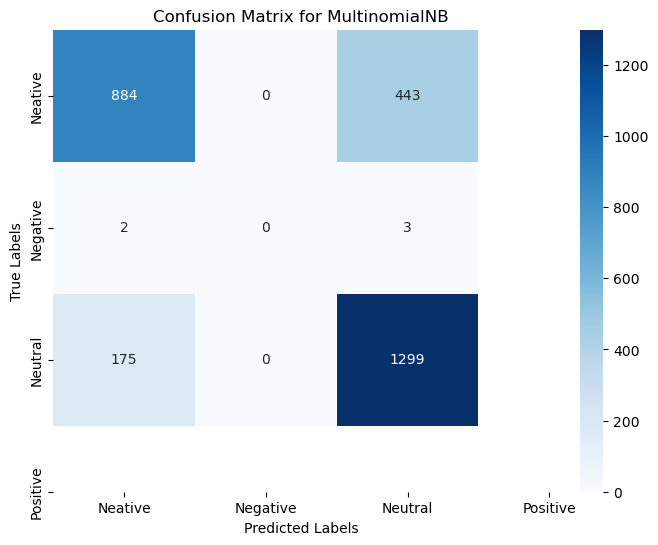


DecisionTreeClassifier Accuracy: 0.7074
              precision    recall  f1-score   support

    Negative       0.69      0.70      0.69      1327
     Neutral       0.00      0.00      0.00         5
    Positive       0.72      0.72      0.72      1474

    accuracy                           0.71      2806
   macro avg       0.47      0.47      0.47      2806
weighted avg       0.71      0.71      0.71      2806



C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


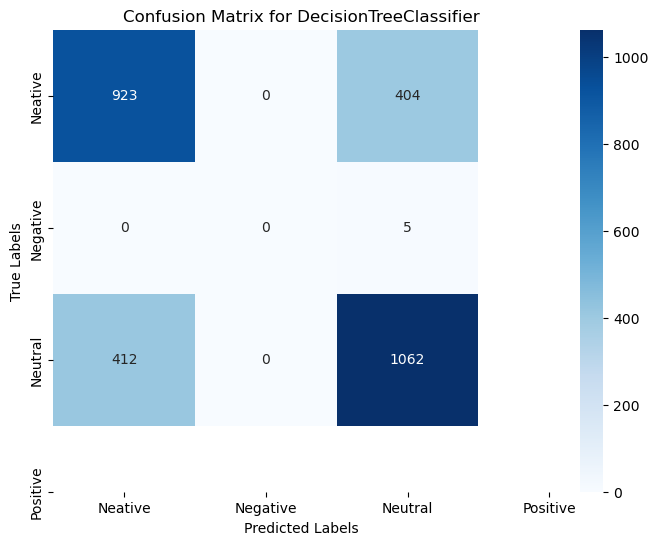


RandomForestClassifier Accuracy: 0.7698
              precision    recall  f1-score   support

    Negative       0.76      0.76      0.76      1327
     Neutral       0.00      0.00      0.00         5
    Positive       0.78      0.78      0.78      1474

    accuracy                           0.77      2806
   macro avg       0.51      0.51      0.51      2806
weighted avg       0.77      0.77      0.77      2806



C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


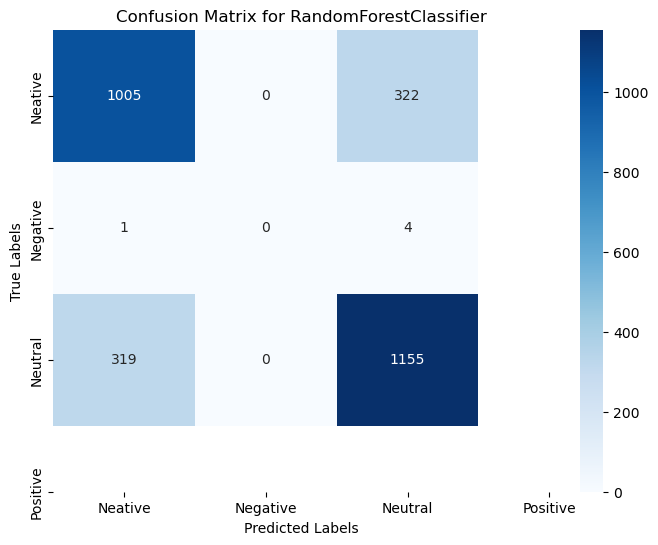


Training and testing for (2, 2)-gram TF-IDF:

MultinomialNB Accuracy: 0.6646


C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    Negative       0.82      0.38      0.52      1327
     Neutral       0.00      0.00      0.00         5
    Positive       0.62      0.92      0.74      1474

    accuracy                           0.66      2806
   macro avg       0.48      0.43      0.42      2806
weighted avg       0.71      0.66      0.64      2806



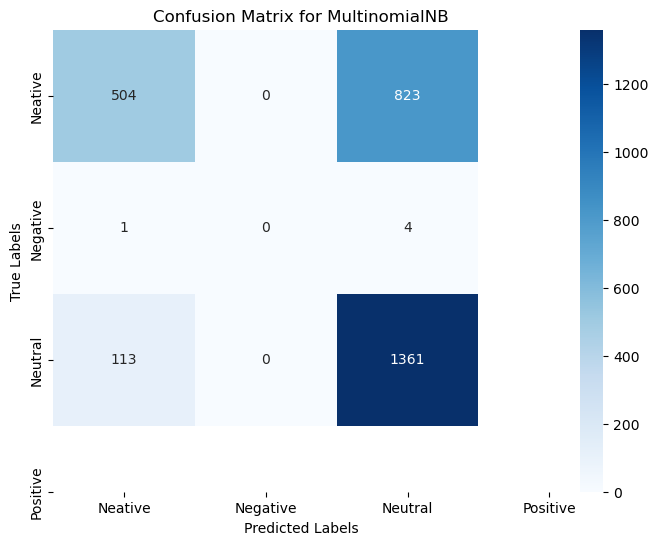


DecisionTreeClassifier Accuracy: 0.5976
              precision    recall  f1-score   support

    Negative       0.66      0.32      0.43      1327
     Neutral       0.00      0.00      0.00         5
    Positive       0.58      0.85      0.69      1474

    accuracy                           0.60      2806
   macro avg       0.41      0.39      0.37      2806
weighted avg       0.62      0.60      0.56      2806



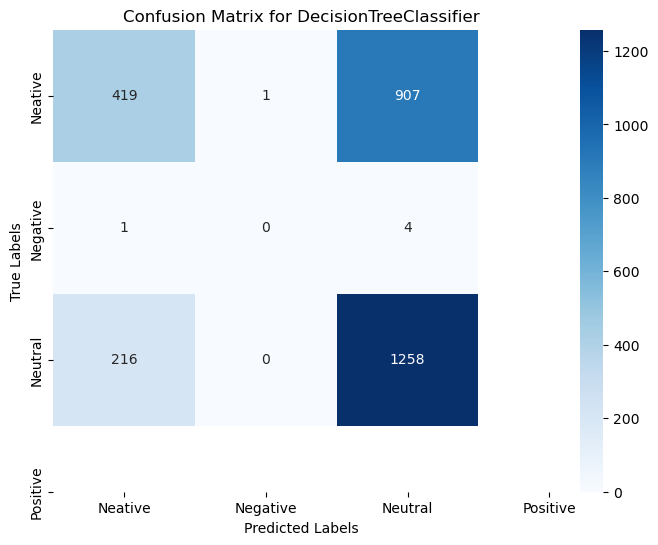


RandomForestClassifier Accuracy: 0.6069
              precision    recall  f1-score   support

    Negative       0.72      0.28      0.40      1327
     Neutral       0.00      0.00      0.00         5
    Positive       0.58      0.90      0.71      1474

    accuracy                           0.61      2806
   macro avg       0.43      0.39      0.37      2806
weighted avg       0.65      0.61      0.56      2806



C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


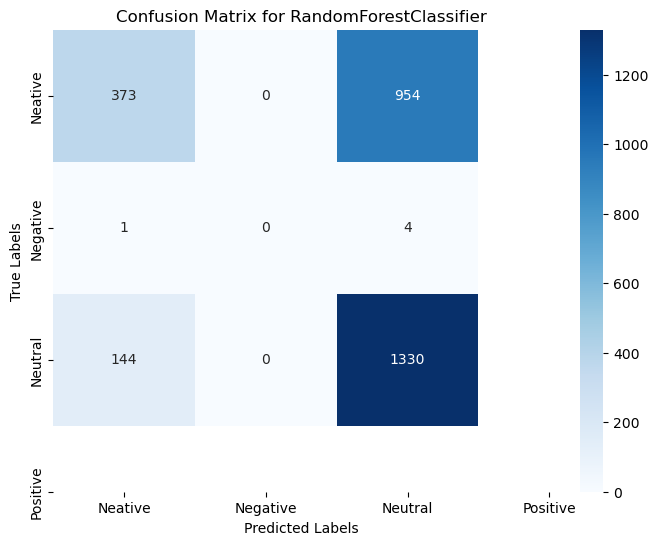


Training and testing for (3, 3)-gram TF-IDF:

MultinomialNB Accuracy: 0.5581


C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    Negative       0.84      0.09      0.16      1327
     Neutral       0.00      0.00      0.00         5
    Positive       0.54      0.99      0.70      1474

    accuracy                           0.56      2806
   macro avg       0.46      0.36      0.29      2806
weighted avg       0.68      0.56      0.44      2806



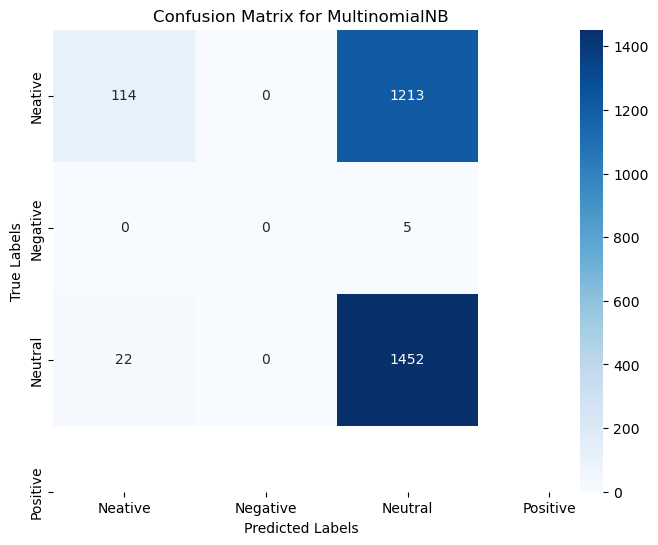


DecisionTreeClassifier Accuracy: 0.5421
              precision    recall  f1-score   support

    Negative       0.67      0.07      0.13      1327
     Neutral       0.00      0.00      0.00         5
    Positive       0.54      0.97      0.69      1474

    accuracy                           0.54      2806
   macro avg       0.40      0.35      0.27      2806
weighted avg       0.60      0.54      0.42      2806



C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


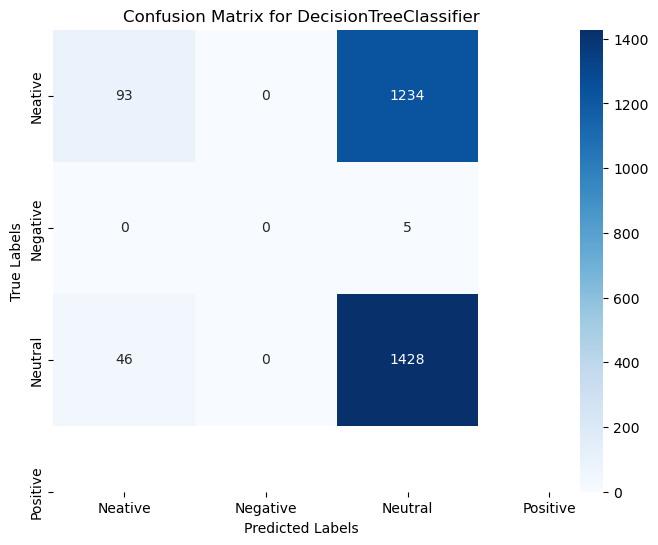


RandomForestClassifier Accuracy: 0.5392
              precision    recall  f1-score   support

    Negative       0.78      0.04      0.08      1327
     Neutral       0.00      0.00      0.00         5
    Positive       0.53      0.99      0.69      1474

    accuracy                           0.54      2806
   macro avg       0.44      0.34      0.26      2806
weighted avg       0.65      0.54      0.40      2806



C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


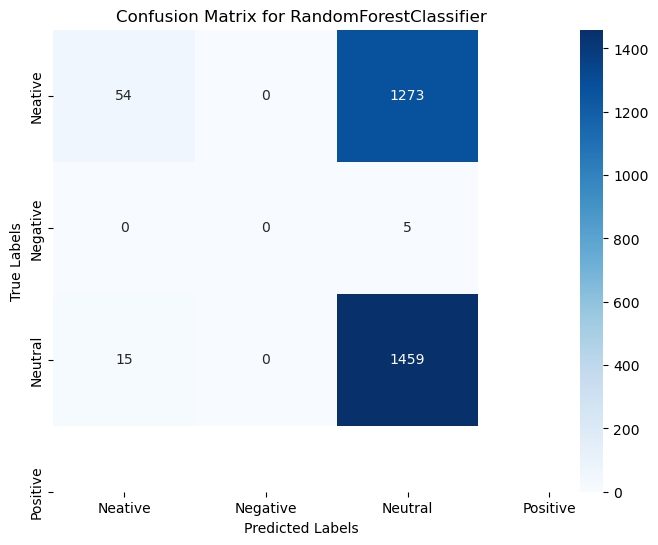


Accuracy Scores:
MultinomialNB: Average Accuracy = 0.6669
DecisionTreeClassifier: Average Accuracy = 0.6157
RandomForestClassifier: Average Accuracy = 0.6386

Best Technique for Detecting Abusive Language: MultinomialNB with an average accuracy of 0.6669


In [30]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace with your dataset path)
data = pd.read_csv('RomanUrduDataSet.csv')
X_text = data['comments']
y = data['classes'].values

# Define n-gram ranges
ngram_ranges = [(1, 1), (2, 2), (3, 3)]

# Initialize lists to store vectorizers and TF-IDF matrices
vectorizers = []
X_tfidfs = []

# Initialize TF-IDF Vectorizers for each n-gram range
for ngram_range in ngram_ranges:
    vectorizer = TfidfVectorizer(ngram_range=ngram_range)#TfidfVectorizer is a class in scikit-learn designed for converting a collection of text documents into a matrix of TF-IDF features.

    X_tfidf = vectorizer.fit_transform(X_text)
    vectorizers.append(vectorizer)
    X_tfidfs.append(X_tfidf)

# Initialize dictionaries to store accuracy scores
accuracy_scores = {'MultinomialNB': [], 'DecisionTreeClassifier': [], 'RandomForestClassifier': []}

# Perform train/test split and train classifiers for each TF-IDF representation
for i, X_tfidf in enumerate(X_tfidfs):
    print(f"\nTraining and testing for {ngram_ranges[i]}-gram TF-IDF:")
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25, random_state=42)
    
    # Initialize classifiers
    classifiers = [
        MultinomialNB(),
        DecisionTreeClassifier(random_state=42),
        RandomForestClassifier(random_state=42)
    ]
    
    # Train each classifier, predict on test set, and evaluate accuracy
    for clf in classifiers:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        # Calculate accuracy
        acc_score = accuracy_score(y_test, y_pred)
        accuracy_scores[clf.__class__.__name__].append(acc_score)
        
        # Print classifier name and accuracy
        print(f"\n{clf.__class__.__name__} Accuracy: {acc_score:.4f}")
        
        # Print classification report
        print(classification_report(y_test, y_pred))
        
        # Create confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        
        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                    xticklabels=clf.classes_, yticklabels=clf.classes_)
        plt.title(f'Confusion Matrix for {clf.__class__.__name__}')
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.show()

# Compare accuracy scores
print("\nAccuracy Scores:")
for clf_name, scores in accuracy_scores.items():
    avg_acc = sum(scores) / len(scores)
    print(f"{clf_name}: Average Accuracy = {avg_acc:.4f}")
    
# Determine which technique is better for detecting abusive language
best_technique = max(accuracy_scores, key=lambda x: sum(accuracy_scores[x]) / len(accuracy_scores[x]))
best_avg_accuracy = sum(accuracy_scores[best_technique]) / len(accuracy_scores[best_technique])
print(f"\nBest Technique for Detecting Abusive Language: {best_technique} with an average accuracy of {best_avg_accuracy:.4f}")



Training and testing for (1, 1)-gram TF-IDF:

MultinomialNB results for (1, 1)-gram TF-IDF:
              precision    recall  f1-score   support

    Negative       0.83      0.67      0.74      1327
     Neutral       0.00      0.00      0.00         5
    Positive       0.74      0.88      0.81      1474

    accuracy                           0.78      2806
   macro avg       0.53      0.52      0.52      2806
weighted avg       0.79      0.78      0.77      2806



C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


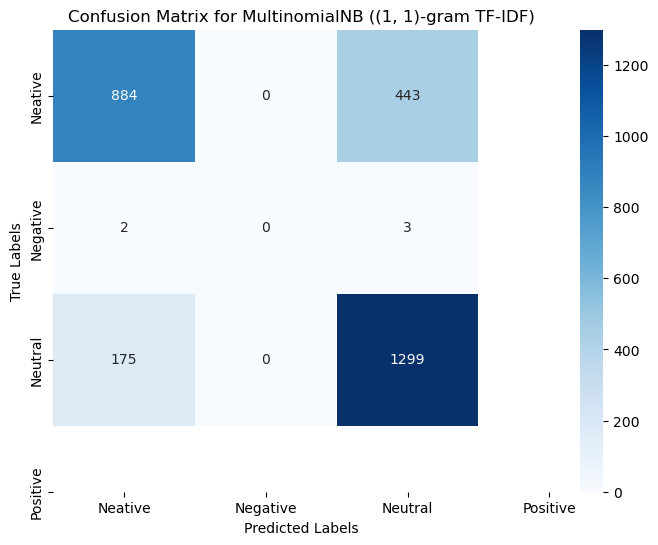


DecisionTreeClassifier results for (1, 1)-gram TF-IDF:
              precision    recall  f1-score   support

    Negative       0.69      0.70      0.69      1327
     Neutral       0.00      0.00      0.00         5
    Positive       0.72      0.72      0.72      1474

    accuracy                           0.71      2806
   macro avg       0.47      0.47      0.47      2806
weighted avg       0.71      0.71      0.71      2806



C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


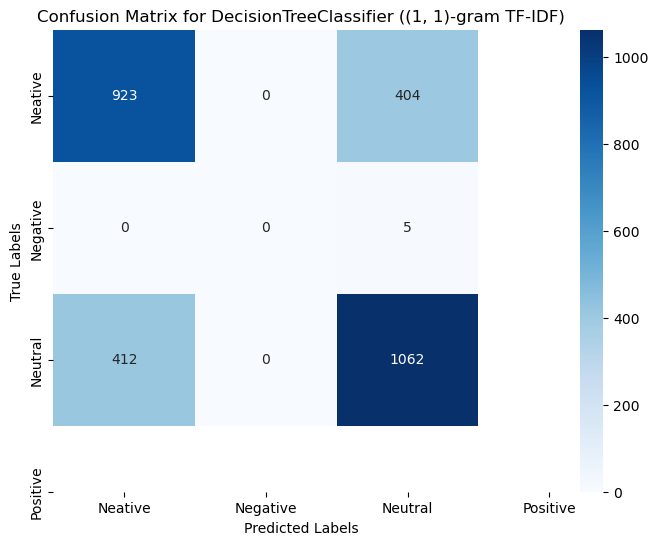


RandomForestClassifier results for (1, 1)-gram TF-IDF:
              precision    recall  f1-score   support

    Negative       0.76      0.76      0.76      1327
     Neutral       0.00      0.00      0.00         5
    Positive       0.78      0.78      0.78      1474

    accuracy                           0.77      2806
   macro avg       0.51      0.51      0.51      2806
weighted avg       0.77      0.77      0.77      2806



C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


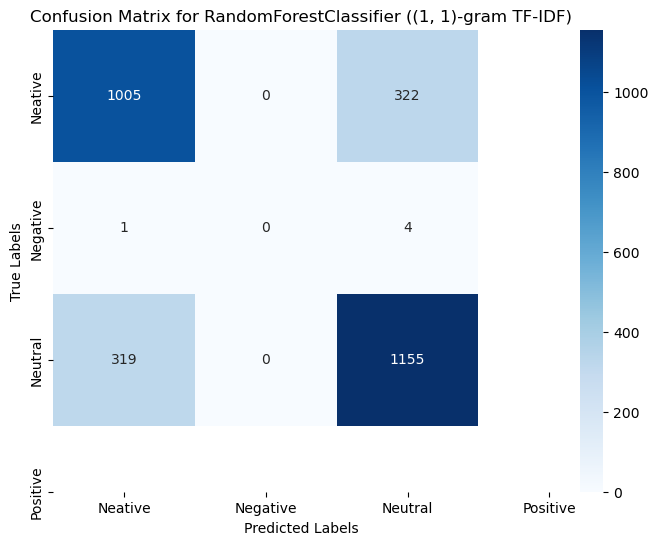


Training and testing for (2, 2)-gram TF-IDF:

MultinomialNB results for (2, 2)-gram TF-IDF:
              precision    recall  f1-score   support

    Negative       0.82      0.38      0.52      1327
     Neutral       0.00      0.00      0.00         5
    Positive       0.62      0.92      0.74      1474

    accuracy                           0.66      2806
   macro avg       0.48      0.43      0.42      2806
weighted avg       0.71      0.66      0.64      2806



C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


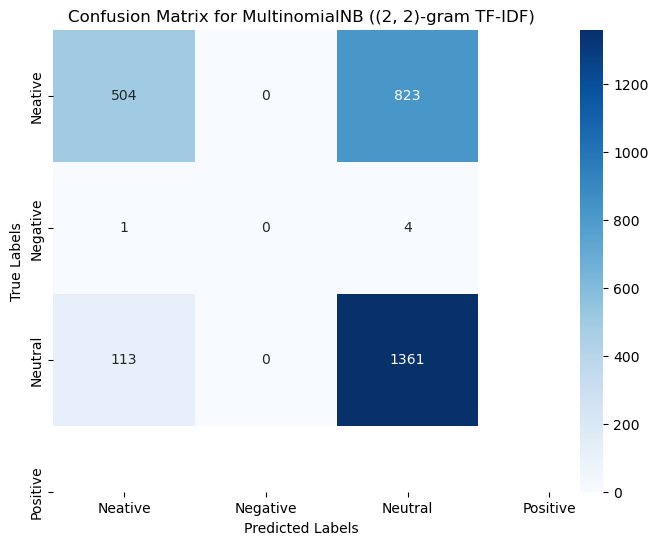


DecisionTreeClassifier results for (2, 2)-gram TF-IDF:
              precision    recall  f1-score   support

    Negative       0.66      0.32      0.43      1327
     Neutral       0.00      0.00      0.00         5
    Positive       0.58      0.85      0.69      1474

    accuracy                           0.60      2806
   macro avg       0.41      0.39      0.37      2806
weighted avg       0.62      0.60      0.56      2806



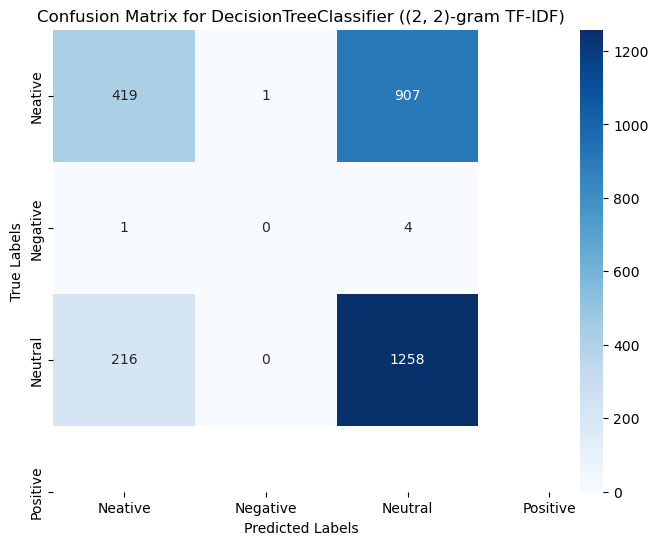


RandomForestClassifier results for (2, 2)-gram TF-IDF:
              precision    recall  f1-score   support

    Negative       0.72      0.28      0.40      1327
     Neutral       0.00      0.00      0.00         5
    Positive       0.58      0.90      0.71      1474

    accuracy                           0.61      2806
   macro avg       0.43      0.39      0.37      2806
weighted avg       0.65      0.61      0.56      2806



C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


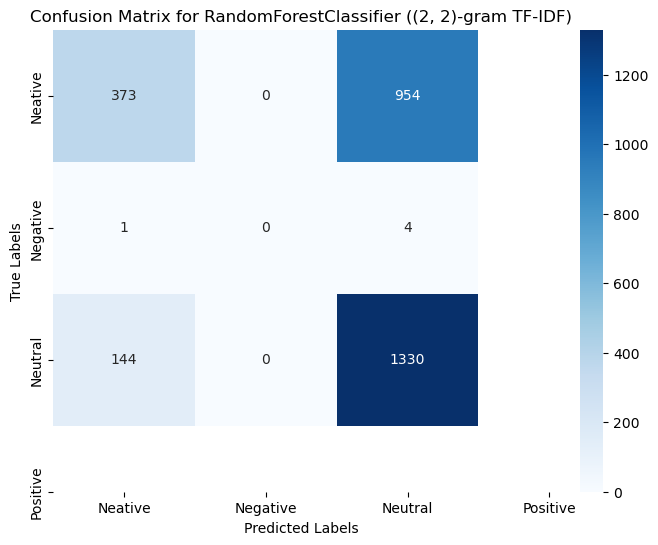


Training and testing for (3, 3)-gram TF-IDF:

MultinomialNB results for (3, 3)-gram TF-IDF:
              precision    recall  f1-score   support

    Negative       0.84      0.09      0.16      1327
     Neutral       0.00      0.00      0.00         5
    Positive       0.54      0.99      0.70      1474

    accuracy                           0.56      2806
   macro avg       0.46      0.36      0.29      2806
weighted avg       0.68      0.56      0.44      2806



C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


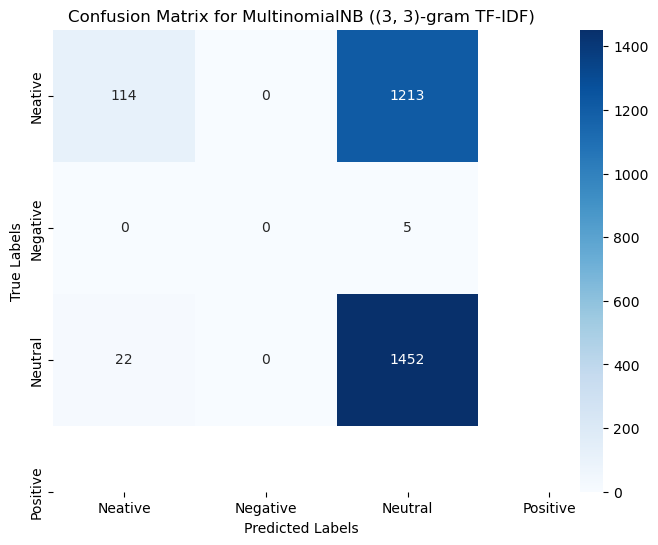


DecisionTreeClassifier results for (3, 3)-gram TF-IDF:
              precision    recall  f1-score   support

    Negative       0.67      0.07      0.13      1327
     Neutral       0.00      0.00      0.00         5
    Positive       0.54      0.97      0.69      1474

    accuracy                           0.54      2806
   macro avg       0.40      0.35      0.27      2806
weighted avg       0.60      0.54      0.42      2806



C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


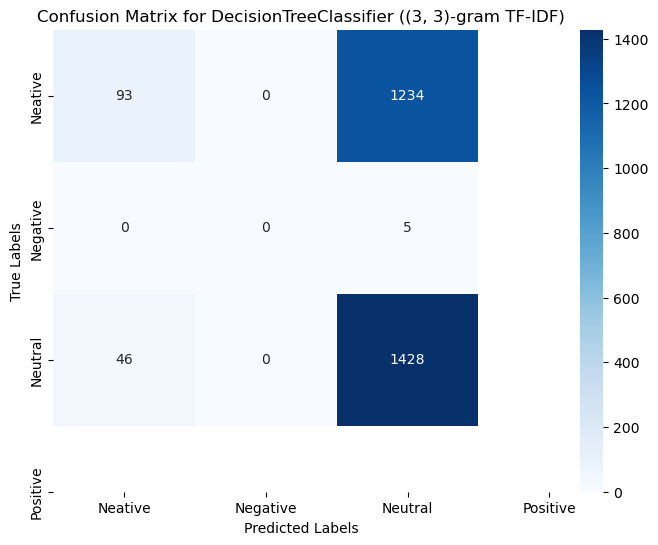


RandomForestClassifier results for (3, 3)-gram TF-IDF:
              precision    recall  f1-score   support

    Negative       0.78      0.04      0.08      1327
     Neutral       0.00      0.00      0.00         5
    Positive       0.53      0.99      0.69      1474

    accuracy                           0.54      2806
   macro avg       0.44      0.34      0.26      2806
weighted avg       0.65      0.54      0.40      2806



C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ahmad talha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


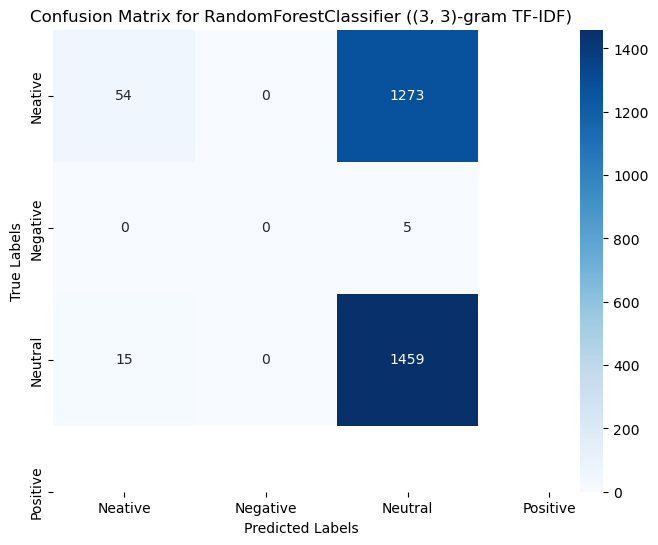


Accuracy Scores:
MultinomialNB Average Accuracy for (1, 1)-gram TF-IDF = 0.7780
DecisionTreeClassifier Average Accuracy for (1, 1)-gram TF-IDF = 0.7074
RandomForestClassifier Average Accuracy for (1, 1)-gram TF-IDF = 0.7698
MultinomialNB Average Accuracy for (2, 2)-gram TF-IDF = 0.6646
DecisionTreeClassifier Average Accuracy for (2, 2)-gram TF-IDF = 0.5976
RandomForestClassifier Average Accuracy for (2, 2)-gram TF-IDF = 0.6069
MultinomialNB Average Accuracy for (3, 3)-gram TF-IDF = 0.5581
DecisionTreeClassifier Average Accuracy for (3, 3)-gram TF-IDF = 0.5421
RandomForestClassifier Average Accuracy for (3, 3)-gram TF-IDF = 0.5392


In [31]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace with your dataset path)
data = pd.read_csv('RomanUrduDataSet.csv')
X_text = data['comments']
y = data['classes'].values

# Define n-gram ranges
ngram_ranges = [(1, 1), (2, 2), (3, 3)]

# Initialize lists to store vectorizers, TF-IDF matrices, and accuracy scores
vectorizers = []
X_tfidfs = []
accuracy_scores = {}

# Initialize TF-IDF Vectorizers for each n-gram range
for ngram_range in ngram_ranges:
    vectorizer = TfidfVectorizer(ngram_range=ngram_range)
    X_tfidf = vectorizer.fit_transform(X_text)
    vectorizers.append(vectorizer)
    X_tfidfs.append(X_tfidf)
    accuracy_scores[ngram_range] = {}

    
# Perform train/test split and train classifiers for each TF-IDF representation
for i, X_tfidf in enumerate(X_tfidfs):
    ngram_range = ngram_ranges[i]
    print(f"\nTraining and testing for {ngram_range}-gram TF-IDF:")
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25, random_state=42)
    
    # Initialize classifiers
    classifiers = [
        MultinomialNB(),
        DecisionTreeClassifier(random_state=42),
        RandomForestClassifier(random_state=42)
    ]
    
    # Train each classifier, predict on test set, and print results
    for clf in classifiers:
        clf.fit(X_train, y_train) #traing on train set 
        y_pred = clf.predict(X_test) #predict on the test data set
        
        # Calculate accuracy score
        acc_score = accuracy_score(y_test, y_pred)
        accuracy_scores[ngram_range][clf.__class__.__name__] = acc_score
        
        # Print classifier name and accuracy
        print(f"\n{clf.__class__.__name__} results for {ngram_range}-gram TF-IDF:")
        print(classification_report(y_test, y_pred))
        
        # Create confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        
        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                    xticklabels=clf.classes_, yticklabels=clf.classes_)
        plt.title(f'Confusion Matrix for {clf.__class__.__name__} ({ngram_range}-gram TF-IDF)')
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.show()

# Print overall accuracy scores
print("\nAccuracy Scores:")
for ngram_range, scores in accuracy_scores.items():
    for clf_name, acc_score in scores.items():
        print(f"{clf_name} Average Accuracy for {ngram_range}-gram TF-IDF = {acc_score:.4f}")
